In [1]:
#import libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
#retrieve data
df=pd.read_csv("/kaggle/input/nsei-prev-data/in_nsei_daily.csv",index_col='minute', parse_dates=True).close
df.index = df.index.to_pydatetime()
df.head()

2017-01-02 09:15:00+05:30    8178.70
2017-01-03 09:15:00+05:30    8188.60
2017-01-04 09:15:00+05:30    8196.55
2017-01-05 09:15:00+05:30    8269.90
2017-01-06 09:15:00+05:30    8247.85
Name: close, dtype: float64

In [3]:
df = pd.DataFrame(df)
df

,close
2017-01-02 09:15:00+05:30,8178.70
2017-01-03 09:15:00+05:30,8188.60
2017-01-04 09:15:00+05:30,8196.55
2017-01-05 09:15:00+05:30,8269.90
2017-01-06 09:15:00+05:30,8247.85
...,...
2022-12-26 09:15:00+05:30,18010.30
2022-12-27 09:15:00+05:30,18136.00
2022-12-28 09:15:00+05:30,18109.25
2022-12-29 09:15:00+05:30,18207.10


In [4]:
#feature extraction
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

In [5]:
#store features
features=['month', 'year', 'day_of_year']
target='close'

In [6]:
#train and test splits
xtrain, xtest, ytrain, ytest=train_test_split(df[features], df[target], test_size=0.15)

In [7]:
#define model
gbr = GradientBoostingRegressor()
print(gbr)

GradientBoostingRegressor()


In [8]:
#fit the model
gbr.fit(xtrain, ytrain)

GradientBoostingRegressor()

In [9]:
#get score
score = gbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9856278765250278


In [10]:
#apply cross validation
scores = cross_val_score(gbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.98


In [11]:
#apply k-folds
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(gbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.98


In [12]:
#calculate accuracy
ypred = gbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 207017.42
RMSE: 454.99


In [13]:
ytest.index

DatetimeIndex(['2022-10-12 09:15:00+05:30', '2022-11-22 09:15:00+05:30',
               '2022-04-18 09:15:00+05:30', '2018-02-16 09:15:00+05:30',
               '2018-08-23 09:15:00+05:30', '2019-04-25 09:15:00+05:30',
               '2019-07-18 09:15:00+05:30', '2019-12-03 09:15:00+05:30',
               '2020-07-14 09:15:00+05:30', '2020-04-08 09:15:00+05:30',
               ...
               '2017-08-18 09:15:00+05:30', '2022-01-27 09:15:00+05:30',
               '2021-04-08 09:15:00+05:30', '2017-11-22 09:15:00+05:30',
               '2017-07-10 09:15:00+05:30', '2022-02-17 09:15:00+05:30',
               '2019-10-09 09:15:00+05:30', '2019-10-24 09:15:00+05:30',
               '2018-06-20 09:15:00+05:30', '2020-01-27 09:15:00+05:30'],
              dtype='datetime64[ns, pytz.FixedOffset(330)]', length=222, freq=None)

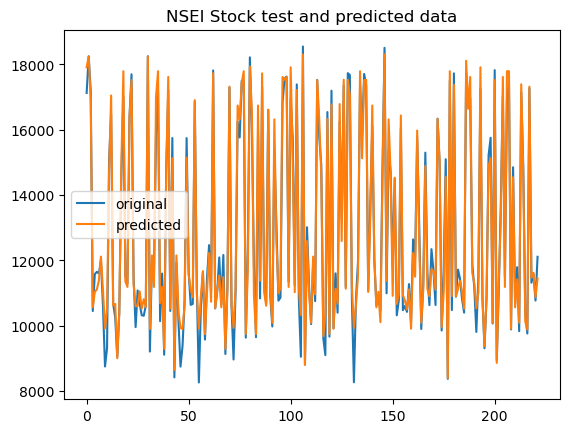

In [14]:
#plot data, better results
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("NSEI Stock test and predicted data")
plt.legend()
plt.show()